In [13]:
#Defining a fuction and plotting it


import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
def f(x):
    return 3*x**2 -4*x +5

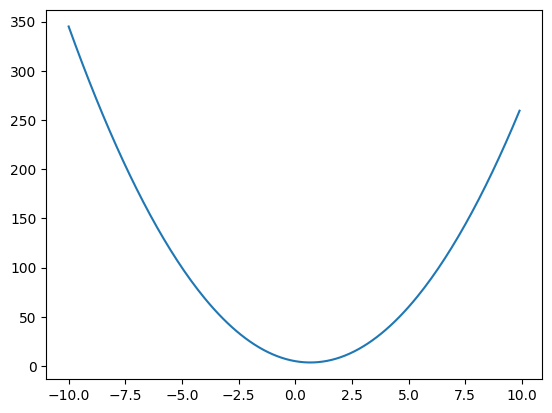

In [15]:
xs = np.arange(-10,10,0.1)
ys = f(xs)
plt.plot(xs, ys)
plt.show()

In [16]:
#Slope of the function at a point
h = 0.000001
x = 3.0
(f(x+h)-f(x))/h

14.000003002223593

In [99]:
#Defining the class - Value


class Value:
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self,other):
        out =  Value(self.data* other.data, (self, other), '*')
        def _backward():
            self.grad = other.data *out.grad
            other.grad = self.data *out.grad
        out._backward = _backward
        
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) -1) / (math.exp(2*x) +1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad = (1-t**2) * out.grad
        out._backward = _backward
        return out
    

In [18]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
#a.__add__(b)
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'

L

Value(data=-8.0)

In [19]:
d._prev, d._op

({Value(data=-6.0), Value(data=10.0)}, '+')

In [20]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# Visualizing the forward pass

from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [22]:
draw_dot(L)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [23]:
#Manual backpropagation

def lol():
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    #a.__add__(b)
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L1 = d * f; L.label='L'

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    #a.__add__(b)
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L2 = d * f; L.label='L'

    L = L2-L1
    return L



In [25]:
L.grad = 1.0 #dL/dL = 1
f.grad = 4.0 #grad value is data value of d #dL/df = d
d.grad = -2.0 #same dL/dd = f
e.grad = -2.0 #dL/de = f * 1
a.grad = 6.0 #dL/da = f * b
b.grad = -4.0 #dL/db = f * a

In [31]:
#Nudging the value of L

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f
L.data

-4.751999999999997

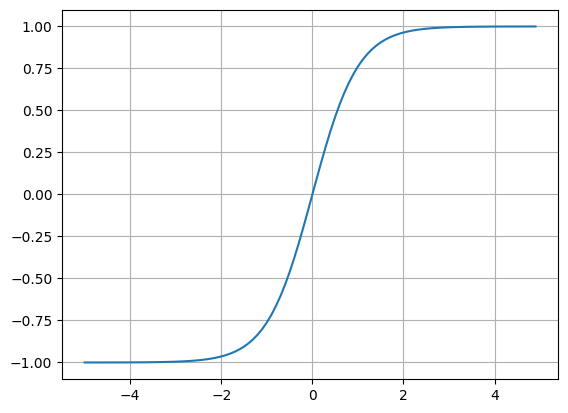

In [35]:
#Plotting the tanh function

plt.plot(np.arange(-5,5,0.1), np.tanh(np.arange(-5,5,0.1)))
plt.grid()


In [121]:
#inputs

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
#bias  
b = Value(6.8813735870195432, label='b')

x1w1 = x1 * w1; x1w1.label='x1w1'
x2w2 = x2 * w2; x2w2.label='x2w2'

x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label='x1w1x2w2'

n = x1w1x2w2 + b; n.label='n'

#activation function
o = n.tanh(); o.label='o'

In [61]:
#Manual backpropagation
o.grad = 1.0
n.grad = 0.5 #do/dn = (1 - o.data**2) * o.grad
x1w1x2w2.grad = 0.5
b.grad = 0.5 #In addition operation, the gradient is passed to both inputs
x1w1.grad = 0.5
x2w2.grad = 0.5

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad


In [123]:
#After defining the _backward in all out operations, we can implement backpropagation as follows:
o.grad = 1.0


In [125]:
o._backward() 

In [127]:
n._backward()

In [129]:
b._backward()

In [131]:
x1w1x2w2._backward()

In [133]:
x1w1._backward()

In [134]:
x2w2._backward()

In [136]:
print("The o data is ", o.data)
print("The o grad is ", o.grad)

print("The n data is ", n.data)
print("The n grad is ", n.grad)

print("The x1w1x2w2 data is ", x1w1x2w2.data)
print("The x1w1x2w2 grad is ", x1w1x2w2.grad)
print("The b data is ", b.data)
print("The b grad is ", b.grad)

print("The x1w1 data is ", x1w1.data)
print("The x1w1 grad is ", x1w1.grad)

print("The x2w2 data is ", x2w2.data)
print("The x2w2 grad is ", x2w2.grad)


print("The x1 data is ", x1.data)
print("The x1 grad is ", x1.grad)

print("The w1 data is ", w1.data)
print("The w1 grad is ", w1.grad)

print("The x2 data is ", x2.data)
print("The x2 grad is ", x2.grad)

print("The w2 data is ", w2.data)
print("The w2 grad is ", w2.grad)

The o data is  0.7071067811865476
The o grad is  1.0
The n data is  0.8813735870195432
The n grad is  0.4999999999999999
The x1w1x2w2 data is  -6.0
The x1w1x2w2 grad is  0.4999999999999999
The b data is  6.881373587019543
The b grad is  0.4999999999999999
The x1w1 data is  -6.0
The x1w1 grad is  0.4999999999999999
The x2w2 data is  0.0
The x2w2 grad is  0.4999999999999999
The x1 data is  2.0
The x1 grad is  -1.4999999999999996
The w1 data is  -3.0
The w1 grad is  0.9999999999999998
The x2 data is  0.0
The x2 grad is  0.4999999999999999
The w2 data is  1.0
The w2 grad is  0.0
